In [5]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import warnings
from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython
import os
from os import listdir
from os.path import isfile, join
import sys
import os, psutil
import anndata
import scanpy.external as sce

warnings.filterwarnings("ignore", category=RRuntimeWarning)
pandas2ri.activate()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sc.settings.verbosity = 3

#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=14)

palette=['#3519ED','#EDFBA8', '#4D2E6A', '#0ECDB4', '#0C23B5', '#92BF0D', '#51F2E4', '#1CB09D', '#BFC1D4', '#A98BF3', '#98D1C6', '#9A5E72', '#B89327', '#6704A5', '#0F64B2', '#A69CF3', '#D97C2E',
        '#321795', '#7E2649', '#65A813', '#734E0F', '#D14FBC', '#2CFA50', '#83610A', '#841032', '#04D8E3', '#8605BA', '#1EF60C', '#602587', '#F9AD1B', '#2BD738', '#C8E239', '#46D1BC',
        '#465A01', '#70C51E', '#924DFB', '#5D28E4', '#712E8D', '#30F465', '#5287E1', '#D16B7F', '#B8EF72', '#03B15D', '#4290F3', '#5E9063', '#B0E39F', '#3C6205', '#ACE603', '#2DE57A',
         '#052B18', '#69BE75', '#8BE509', '#C37041', '#E218BA', '#5AC097', '#A597C4','#2A13B5', '#823FA7', '#C8F349', '#7C482A', '#A104E5', '#8E3C27', '#1DB457', '#36FDC7', '#60A934', '#F43B78',
        '#74EF61', '#810527', '#6D293F', '#F1A709', '#274F6C', '#104EB5', '#6D02CE', '#B36AE5', '#13F9BA', '#C7281F', '#31572B', '#07D94B', '#B45E18', '#9F73D1', '#3CA059', '#4D6B1C', 
        '#3BA785', '#E3084C', '#A61BF4', '#F3D50A', '#640A32', '#FB0D73', '#AD0126', '#279136', '#480EB1', '#634158', '#FD80E5', '#CF26AE', '#046DB9', '#15F6B8', '#1A047C', '#D14826', 
        '#45D160', '#C6039B', '#D9C23F', '#70829B', '#940ECF', '#9FAB37', '#BA84C7', '#68F275', '#C79EA1', '#6E89B7', '#712D6C', '#F51D8C', '#D564E0', '#24EA18', '#459C71', '#23F50B', 
        '#3E57C8', '#6D78F9', '#07EC9F', '#3078C5', '#53EC0A','#D283E5', '#16039B', '#61E0A8', '#10A659', '#52374A', '#B31EC4', '#254D10', '#D5B0F4', '#A79E35', '#2D0F45', '#562D18', 
        '#ABE562', '#9A0842', '#92165C', '#FCD98A', '#B384DA', '#3CB108', '#2FE04C', '#386CA2', '#423719', '#E540C2', '#C58DE9', '#F6B8E4','#87592B', '#94D53F', '#4AB5E3', '#B0E96C',
        '#AD94E6', '#E237B8', '#21F0B9', '#FB9C73']


In [3]:
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                         8.4.0
anyio                       NA
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
brotli                      1.0.9
certifi                     2021.10.08
cffi                        1.15.0
chardet                     4.0.0
charset_normalizer          2.0.8
cloudpickle 

# Plotting

In [11]:
#Load Healthy adata
path = '/path/to/directory/'
list_of_healthy_datasets = ['01-1-Brain-Habib-2017-processed.h5ad',
                            '01-2-Brain_Cerebellum-Han-2020-processed.h5ad',
                            '01-3-Brain_TemporalLobe-Han-2020-processed.h5ad',
                            
                            '04-1-Oesophagus-Madissoon-2019-processed.h5ad',
                            '04-9-Oesophagus-Han-2020-processed.h5ad',
                            '04-2-Gut_Colon-James-2020-processed.h5ad',
                            '04-3-Gut_Colon_SmallIntestine-Simmons-2021-processed.h5ad',
                            '04-4-Gut_Colon-Wang-2019-processed.h5ad',
                            '04-6-Gut_Colon-Pisco-2022-processed.h5ad',
                            
                            '05-1-Liver-MacParland-2018-processed.h5ad',
                            '05-2-Liver-Ramachandran-2019-processed.h5ad',
                            '05-4-Liver-Pisco-2022-processed.h5ad',
                            '05-3-Liver-Andrews-2021-processed.h5ad',
                            '05-6-Liver-Han-2020-processed.h5ad',
                            '05-7-Liver_ImmuneCells-Teichmann-2022-processed.h5ad',
                             
                            '06-1-Pancreas-Baron-2016-processed.h5ad',
                            '06-2-Pancreas-Peng-2019-processed.h5ad',
                            '06-3-Pancreas-Enge-2017-processed.h5ad',
                            '06-4-Pancreas-Oudenaarden-2016-processed.h5ad',
                            '06-5-Pancreas-Pisco-2022-processed.h5ad',
                            '06-6-Pancreas-Han-2020-processed.h5ad',
                            
                            '07-1-Spleen-Pisco-2022-processed.h5ad',
                            '07-2-Spleen-Han-2020-processed.h5ad',
                            '07-3-Spleen_ImmuneCells-Teichmann-2022-processed.h5ad',
                             
                            '08-1-LymphNode-Kim-2020-processed.h5ad',
                            '08-2-LymphNode-Butcher-2020-processed.h5ad',
                            '08-4-LymphNode-Pisco-2022-processed.h5ad',
                            '08-6-LymphNode_ImmuneCells-Teichmann-2022-processed.h5ad',

                            '09-1-Lung-Travaglini-2020-processed.h5ad',
                            '09-2-Lung-Madissoon-2019-processed.h5ad',
                            '09-3-Lung-Reyfman-2019-processed.h5ad',
                            '09-4-Lung-Kim-2020-processed.h5ad',
                            '09-5-Lung-Pisco-2022-processed.h5ad',
                            '09-7-Lung-Han-2020-processed.h5ad',
                            '09-9-Lung_ImmuneCells-Teichmann-2022-processed.h5ad',
                            
                            '10-1-Heart-Han-2020-processed.h5ad',
                            '10-2_1-Heart-Teichmann-2020-processed.h5ad',
                            '10-2_2-Heart-Teichmann-2020-processed.h5ad',
                            '10-2_3-Heart-Teichmann-2020-processed.h5ad',
                            '10-3-Heart-Pisco-2022-processed.h5ad',
                             
                            '11-2-Blood-Pisco-2022-processed.h5ad',
                            '11-5-Blood-Han-2020-processed.h5ad',
                            '11-6-Blood_ImmuneCells-Teichmann-2022-processed.h5ad',
                             
                            '12-1-BoneMarrow-VanGalen-2019-processed.h5ad',
                            '12-3-BoneMarrow-Pisco-2022-processed.h5ad',
                            '12-4-BoneMarrow-Han-2020-processed.h5ad',
                            '12-5-BoneMarrow_ImmuneCells-Teichmann-2022-processed.h5ad',
                             
                            '13-1-Skin-Cheng-2018-processed.h5ad',
                            '13-2-Skin-Pisco-2022-processed.h5ad',
                             
                            '15-1-Kidney-Steward-2019-processed.h5ad',
                            '15-2-Kidney-Wilson-2021-processed.h5ad',
                            '15-3-Kidney-Pisco-2022-processed.h5ad',
                            '15-4-Kidney-Han-2020-processed.h5ad'
                           ]


In [2]:
critical_cells = ['Alveolar cells', 'Astrocytes', 'Cardiomyocytes', 'Endothelial cells',  'Microglial cells', 'NK cells', 'Neurons', 'Retinal photoreceptor cells',
                  'Oligodendrocytes', 'Podocytes', 'T cells', 'Tubule cells', 'Hematopoietic stem cells' ]

In [3]:
organ_list = ['AdiposeTissue', 'AdrenalGland', '-Bladder', 'Blood', 'BoneMarrow',
       'Brain', 'Breast', 'Eye', 'FallopianTube', 'GallBladder',
       'Colon', 'SmallIntestine', 'Heart', 'Kidney', 'Liver', 'Lung',
       'LymphNode', 'Muscle', 'Oesophagus', 'Omentum', 'Pancreas', 'Placenta',
       'Pleura', 'Prostate', 'SalivaryGland', 'Skin', 'Spleen', 'Stomach',
       'Thymus', 'ThyroidGland', 'Tongue', 'Trachea', 'Ureter', 'Uterus', 'Vasculature']

In [4]:
final_druggable = ['CD80', 'CD86', 'CD274', 'TNFRSF8']

In [ ]:
important_obs = ['Organ','Organ_Specific', 'Dataset', 'InternDatasetNumber', 'Dataset_status', 
                 'celltype', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age',
                 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3']


for i in range(len(list_of_healthy_datasets)):
    print(list_of_healthy_datasets[i])
    
    if i == 0:
        adata = sc.read(path +  list_of_healthy_datasets[i])
        adata.var['genes'] = adata.var.index
        ix=np.isin(adata.var['genes'], final_druggable)
        adata=adata[:,ix].copy()
        adata.var_names_make_unique()
        adata.obs_names_make_unique()
        
        adata_obs_list = adata.obs.columns.tolist()
        for obs_value in adata_obs_list:
            if obs_value in important_obs:
                u = 0
            else:
                del adata.obs[obs_value]
        del adata.var
        del adata.obsm
        del adata.layers
        
        adata_healthy = adata.copy()
        
    else:
        adata = sc.read(path +  list_of_healthy_datasets[i])
        adata.var['genes'] = adata.var.index
        ix=np.isin(adata.var['genes'], final_druggable)
        adata=adata[:,ix].copy()
        
        adata_obs_list = adata.obs.columns.tolist()
        for obs_value in adata_obs_list:
            if obs_value in important_obs:
                u = 0
            else:
                del adata.obs[obs_value]
        del adata.var
        del adata.obsm
        del adata.layers
        print('Number of cells: ', len(adata.obs))
        
        adata_healthy = adata_healthy.concatenate(adata,
                                         join='outer', index_unique="_")
        
    %reset_selective -f "^adata$"
    
    print('Size File GB: ', sys.getsizeof(adata_healthy) / (1024*1024*1024.0))
    process = psutil.Process(os.getpid())
    print('RAM GB: ', process.memory_info().rss / (1024*1024*1024.0))
    print('Number of cells: ', len(adata_healthy.obs))
    print('__________________________________________________________________')
        
adata_healthy.strings_to_categoricals()

01-1-Brain-Habib-2017-RubenBrabenec_HealthyProject-processed.h5ad
Size File GB:  0.006403445266187191
RAM GB:  3.8811378479003906
Number of cells:  13067
__________________________________________________________________
01-2-Brain_Cerebellum-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  7305


/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Size File GB:  0.01487797498703003
RAM GB:  6.722206115722656
Number of cells:  20372
__________________________________________________________________
01-3-Brain_TemporalLobe-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  9520
Size File GB:  0.021963784471154213
RAM GB:  6.524497985839844
Number of cells:  29892
__________________________________________________________________
01-4-Brain_SupragranularIntratelencephalicProjectingNeurons-Lein-2020-RubenBrabenec_IllProject-processed.h5ad


/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells:  302
Size File GB:  0.027556714601814747
RAM GB:  7.754859924316406
Number of cells:  30194
__________________________________________________________________
04-1-Oesophagus-Madissoon-2019-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  79267
Size File GB:  0.1152094816789031
RAM GB:  27.800048828125
Number of cells:  109461
__________________________________________________________________
04-9-Oesophagus-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  11313
Size File GB:  0.1269450942054391
RAM GB:  12.454826354980469
Number of cells:  120774
__________________________________________________________________
04-2-Gut_Colon-James-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  41640
Size File GB:  0.16874258778989315
RAM GB:  22.645828247070312
Number of cells:  162414
__________________________________________________________________
04-3-Gut_Colon_SmallIntestine-Simmons-2021-RubenBrabenec_HealthyProject-proces

/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    []

    Inferred to be: empty

  value_idx = self._prep_dim_index(value.index, attr)


Number of cells:  3638
Size File GB:  0.32960270065814257
RAM GB:  50.135684967041016
Number of cells:  315343
__________________________________________________________________
04-6-Gut_Colon-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  13675
Size File GB:  0.3441316783428192
RAM GB:  44.44447326660156
Number of cells:  329018
__________________________________________________________________
05-1-Liver-MacParland-2018-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  6271
Size File GB:  0.35095416009426117
RAM GB:  50.694480895996094
Number of cells:  335289
__________________________________________________________________
05-2-Liver-Ramachandran-2019-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  33519


/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Size File GB:  0.4055238766595721
RAM GB:  53.965023040771484
Number of cells:  368808
__________________________________________________________________
05-4-Liver-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  4988
Size File GB:  0.41138759907335043
RAM GB:  55.284786224365234
Number of cells:  373796
__________________________________________________________________
05-3-Liver-Andrews-2021-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  139136
Size File GB:  0.5637899311259389
RAM GB:  57.72216796875
Number of cells:  512932
__________________________________________________________________
05-6-Liver-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  10549
Size File GB:  0.5757986539974809
RAM GB:  59.55082702636719
Number of cells:  523481
__________________________________________________________________
05-7-Liver_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  13138
Size File GB

/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


Number of cells:  41503
Size File GB:  1.1508007608354092
RAM GB:  69.77986907958984
Number of cells:  1047728
__________________________________________________________________
09-4-Lung-Kim-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  36334
Size File GB:  1.1892419615760446
RAM GB:  75.45820617675781
Number of cells:  1084062
__________________________________________________________________
09-5-Lung-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  35654
Size File GB:  1.228913189843297
RAM GB:  59.56434631347656
Number of cells:  1119716
__________________________________________________________________
09-7-Lung-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  23999
Size File GB:  1.255956999026239
RAM GB:  64.08787155151367
Number of cells:  1143715
__________________________________________________________________
09-9-Lung_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad
Number of cells:  

In [7]:
adata_healthy

AnnData object with n_obs × n_vars = 2452301 × 4
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3', 'batch'

In [8]:
adata_healthy.write('/lustre/groups/ml01/workspace/moritz.thomas/AML_celltherapy/adrian_backup.h5ad')

In [5]:
adata_healthy=sc.read('/lustre/groups/ml01/workspace/moritz.thomas/AML_celltherapy/adrian_backup.h5ad')

In [6]:
sc.set_figure_params(vector_friendly=True, color_map='Reds', dpi=200,transparent=True, fontsize=14)

In [7]:
organs_list = adata_healthy.obs['Organ'].cat.categories.tolist()

In [8]:
organs_list

['Blood',
 'BoneMarrow',
 'Brain',
 'Gut_Colon',
 'Gut_SmallIntestine',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'LymphNode',
 'Oesophagus',
 'Pancreas',
 'Skin',
 'Spleen']

In [9]:
# remove unknown cells
ix=np.isin(adata_healthy.obs['celltype'],['Adipocytes', 'Airway epithelial cells', 'Alveolar cells', 'Astrocytes',
       'B cells', 'Basal cells', 'Basophil cells', 'Cardiomyocytes',
       'Cerebellar epithelial cells', 'Cholangiocytes', 'Chondrocytes',
       'Collecting duct system cells', 'Common lymphoid progenitor cells',
       'Common myeloid progenitor cells', 'Dendritic cells',
       'Endothelial cells', 'Eosinophils', 'Erythroid cells',
       'Erythroid progenitor cells', 'Fibroblast cells', 'Fibromyocyte cells',
       'Glial cells', 'Glomerular visceral epithelial cells',
       'Granulocyte cells', 'Granulocyte-monocyte progenitor cells',
       'Hematopoietic stem cells', 'Hepatic progenitor cells',
       'Hepatic stellate cells', 'Hepatocytes', 'Innate lymphoid cells',
       'Intestinal epithelial cells', 'Intestinal progenitor cells',
       'Intestinal secretory cells', 'Intestinal stem cells', 'Keratinocytes',
       'Kupffer cells', 'Leukocytes', 'Lymphatic endothelial cells',
       'Lymphocytes', 'Macrophages', 'Mast cells', 'Megakaryocytes',
       'Melanocytes', 'Mesangial cells', 'Mesenchymal stromal cells',
       'Mesothelial cells', 'Microglial cells', 'Monocytes',
       'Mucosal squamous cells', 'Multiciliated cells',
       'Multipotent progenitor cells', 'Myeloid cells', 'Myofibroblast cells',
       'NK cells', 'Neuroendocrine cells', 'Neuronal stem cells', 'Neurons',
       'Neutrophils', 'Oesophageal MT high cells',
       'Oesophageal epithelial cells', 'Oligodendrocytes',
       'Pancreatic acinar cells', 'Pancreatic ductal cells',
       'Pancreatic endocrine cells', 'Pancreatic stellate cells',
       'Parietal epithelial cells', 'Pericytes', 'Plasma cells', 'Podocytes',
       'Secretory cells', 'Skeletal muscle cells',
       'Smooth muscle cells', 'T cells', 'Thrombocytes', 'Tubule cells',
       'Ureteric epithelial cells', 'Urothelial cells']) 
adata_healthy=adata_healthy[ix].copy()

In [10]:
# always same categories order for celltypes

In [14]:
adata_healthy.obs['celltype'].cat.categories

Index(['Adipocytes', 'Airway epithelial cells', 'Alveolar cells', 'Astrocytes',
       'B cells', 'Basal cells', 'Basophil cells', 'Cardiomyocytes',
       'Cerebellar epithelial cells', 'Cholangiocytes', 'Chondrocytes',
       'Collecting duct system cells', 'Common lymphoid progenitor cells',
       'Common myeloid progenitor cells', 'Dendritic cells',
       'Endothelial cells', 'Eosinophils', 'Erythroid cells',
       'Erythroid progenitor cells', 'Fibroblast cells', 'Fibromyocyte cells',
       'Glial cells', 'Glomerular visceral epithelial cells',
       'Granulocyte cells', 'Granulocyte-monocyte progenitor cells',
       'Hematopoietic stem cells', 'Hepatic progenitor cells',
       'Hepatic stellate cells', 'Hepatocytes', 'Innate lymphoid cells',
       'Intestinal epithelial cells', 'Intestinal progenitor cells',
       'Intestinal secretory cells', 'Intestinal stem cells', 'Keratinocytes',
       'Kupffer cells', 'Leukocytes', 'Lymphatic endothelial cells',
       'Lymphocyte

In [ ]:
cat_order=[
    #immune
    'Common lymphoid progenitor cells','Innate lymphoid cells','Lymphatic endothelial cells',
    'Common myeloid progenitor cells', 'Myeloid cells',
    'Monocytes','Macrophages', 'Dendritic cells','Mast cells', 'Megakaryocytes',
    'Lymphocytes', 'B cells','T cells', 'NK cells', 
    
    #general
    'Endothelial cells','Mesenchymal stromal cells','Mesothelial cells', 
    'Erythroid cells','Erythroid progenitor cells', 
    'Fibroblast cells', 'Fibromyocyte cells', 'Multiciliated cells','Secretory cells', 
    'Granulocyte cells','Granulocyte-monocyte progenitor cells', 'Neutrophils', 'Basophil cells', 'Eosinophils', 
    
    #specific
    
    
    'Adipocytes', 'Airway epithelial cells', 'Alveolar cells', 'Astrocytes',
        'Basal cells', 'Cardiomyocytes',
       'Cerebellar epithelial cells', 'Cholangiocytes', 'Chondrocytes',
       'Collecting duct system cells',
        
       'Glial cells', 'Glomerular visceral epithelial cells',
       
    
       'Hematopoietic stem cells', 'Hepatic progenitor cells',
       'Hepatic stellate cells', 'Hepatocytes', 
       'Intestinal epithelial cells', 'Intestinal progenitor cells',
       'Intestinal secretory cells', 'Intestinal stem cells', 'Keratinocytes',
       'Kupffer cells', 'Leukocytes', 
       
       'Melanocytes', 'Mesangial cells', 
       'Microglial cells', 
       'Mucosal squamous cells',
    
       'Multipotent progenitor cells',  'Myofibroblast cells',
       'Neuroendocrine cells', 'Neuronal stem cells', 'Neurons',
       'Oesophageal MT high cells',
       'Oesophageal epithelial cells', 'Oligodendrocytes',
       'Pancreatic acinar cells', 'Pancreatic ductal cells',
       'Pancreatic endocrine cells', 'Pancreatic stellate cells',
       'Parietal epithelial cells', 'Pericytes', 'Plasma cells', 'Podocytes',
       'Skeletal muscle cells',
       'Smooth muscle cells', 'Thrombocytes', 'Tubule cells',
       'Ureteric epithelial cells', 'Urothelial cells']

In [11]:
critical_cells=['Alveolar cells',
 'Astrocytes',
 'Cardiomyocytes',
 'Endothelial cells',
 'Neurons',
 'Oligodendrocytes',
 'Podocytes',
 'Tubule cells',
 'Hematopoietic stem cells']

In [12]:
ix=np.isin(adata_healthy.obs['celltype'],critical_cells) 
adata_crit=adata_healthy[ix].copy()

In [13]:
adata_crit.obs.celltype.cat.categories

Index(['Alveolar cells', 'Astrocytes', 'Cardiomyocytes', 'Endothelial cells',
       'Hematopoietic stem cells', 'Neurons', 'Oligodendrocytes', 'Podocytes',
       'Tubule cells'],
      dtype='object')

In [14]:
crit_order=['Endothelial cells',
            'Alveolar cells',
            'Astrocytes','Neurons', 'Oligodendrocytes',
            'Cardiomyocytes','Podocytes','Tubule cells','Hematopoietic stem cells']

adata_crit.obs['celltype'].cat.reorder_categories(crit_order, inplace=True)

In [15]:
adata_crit

AnnData object with n_obs × n_vars = 731651 × 4
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3', 'batch'

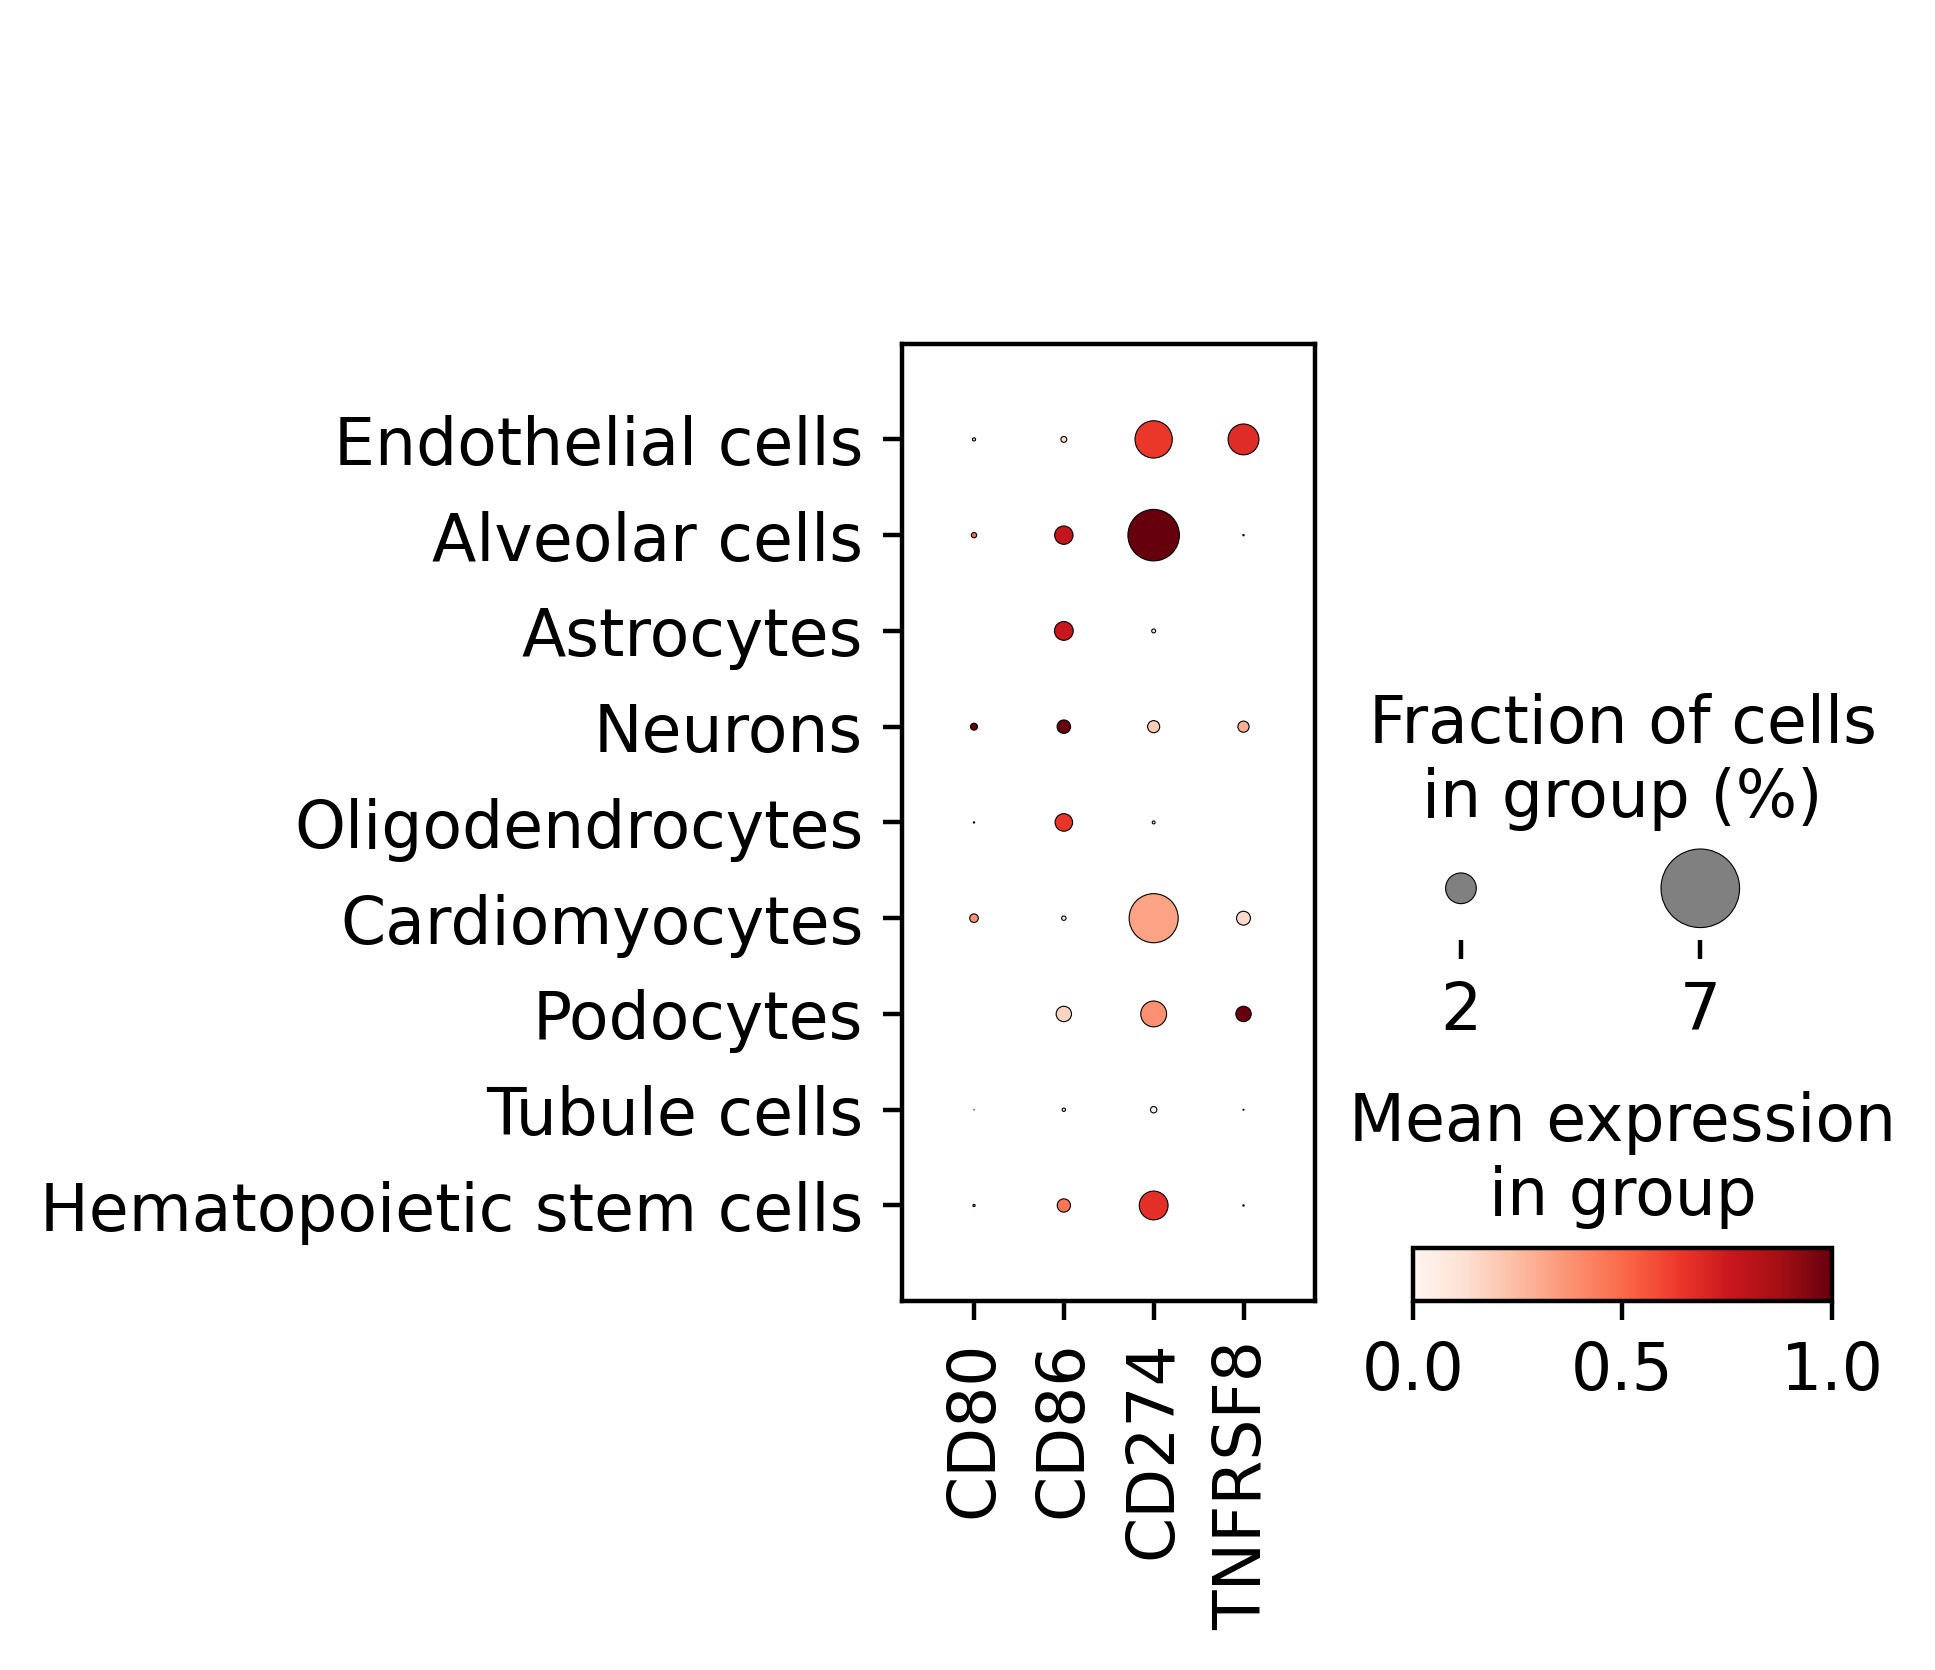

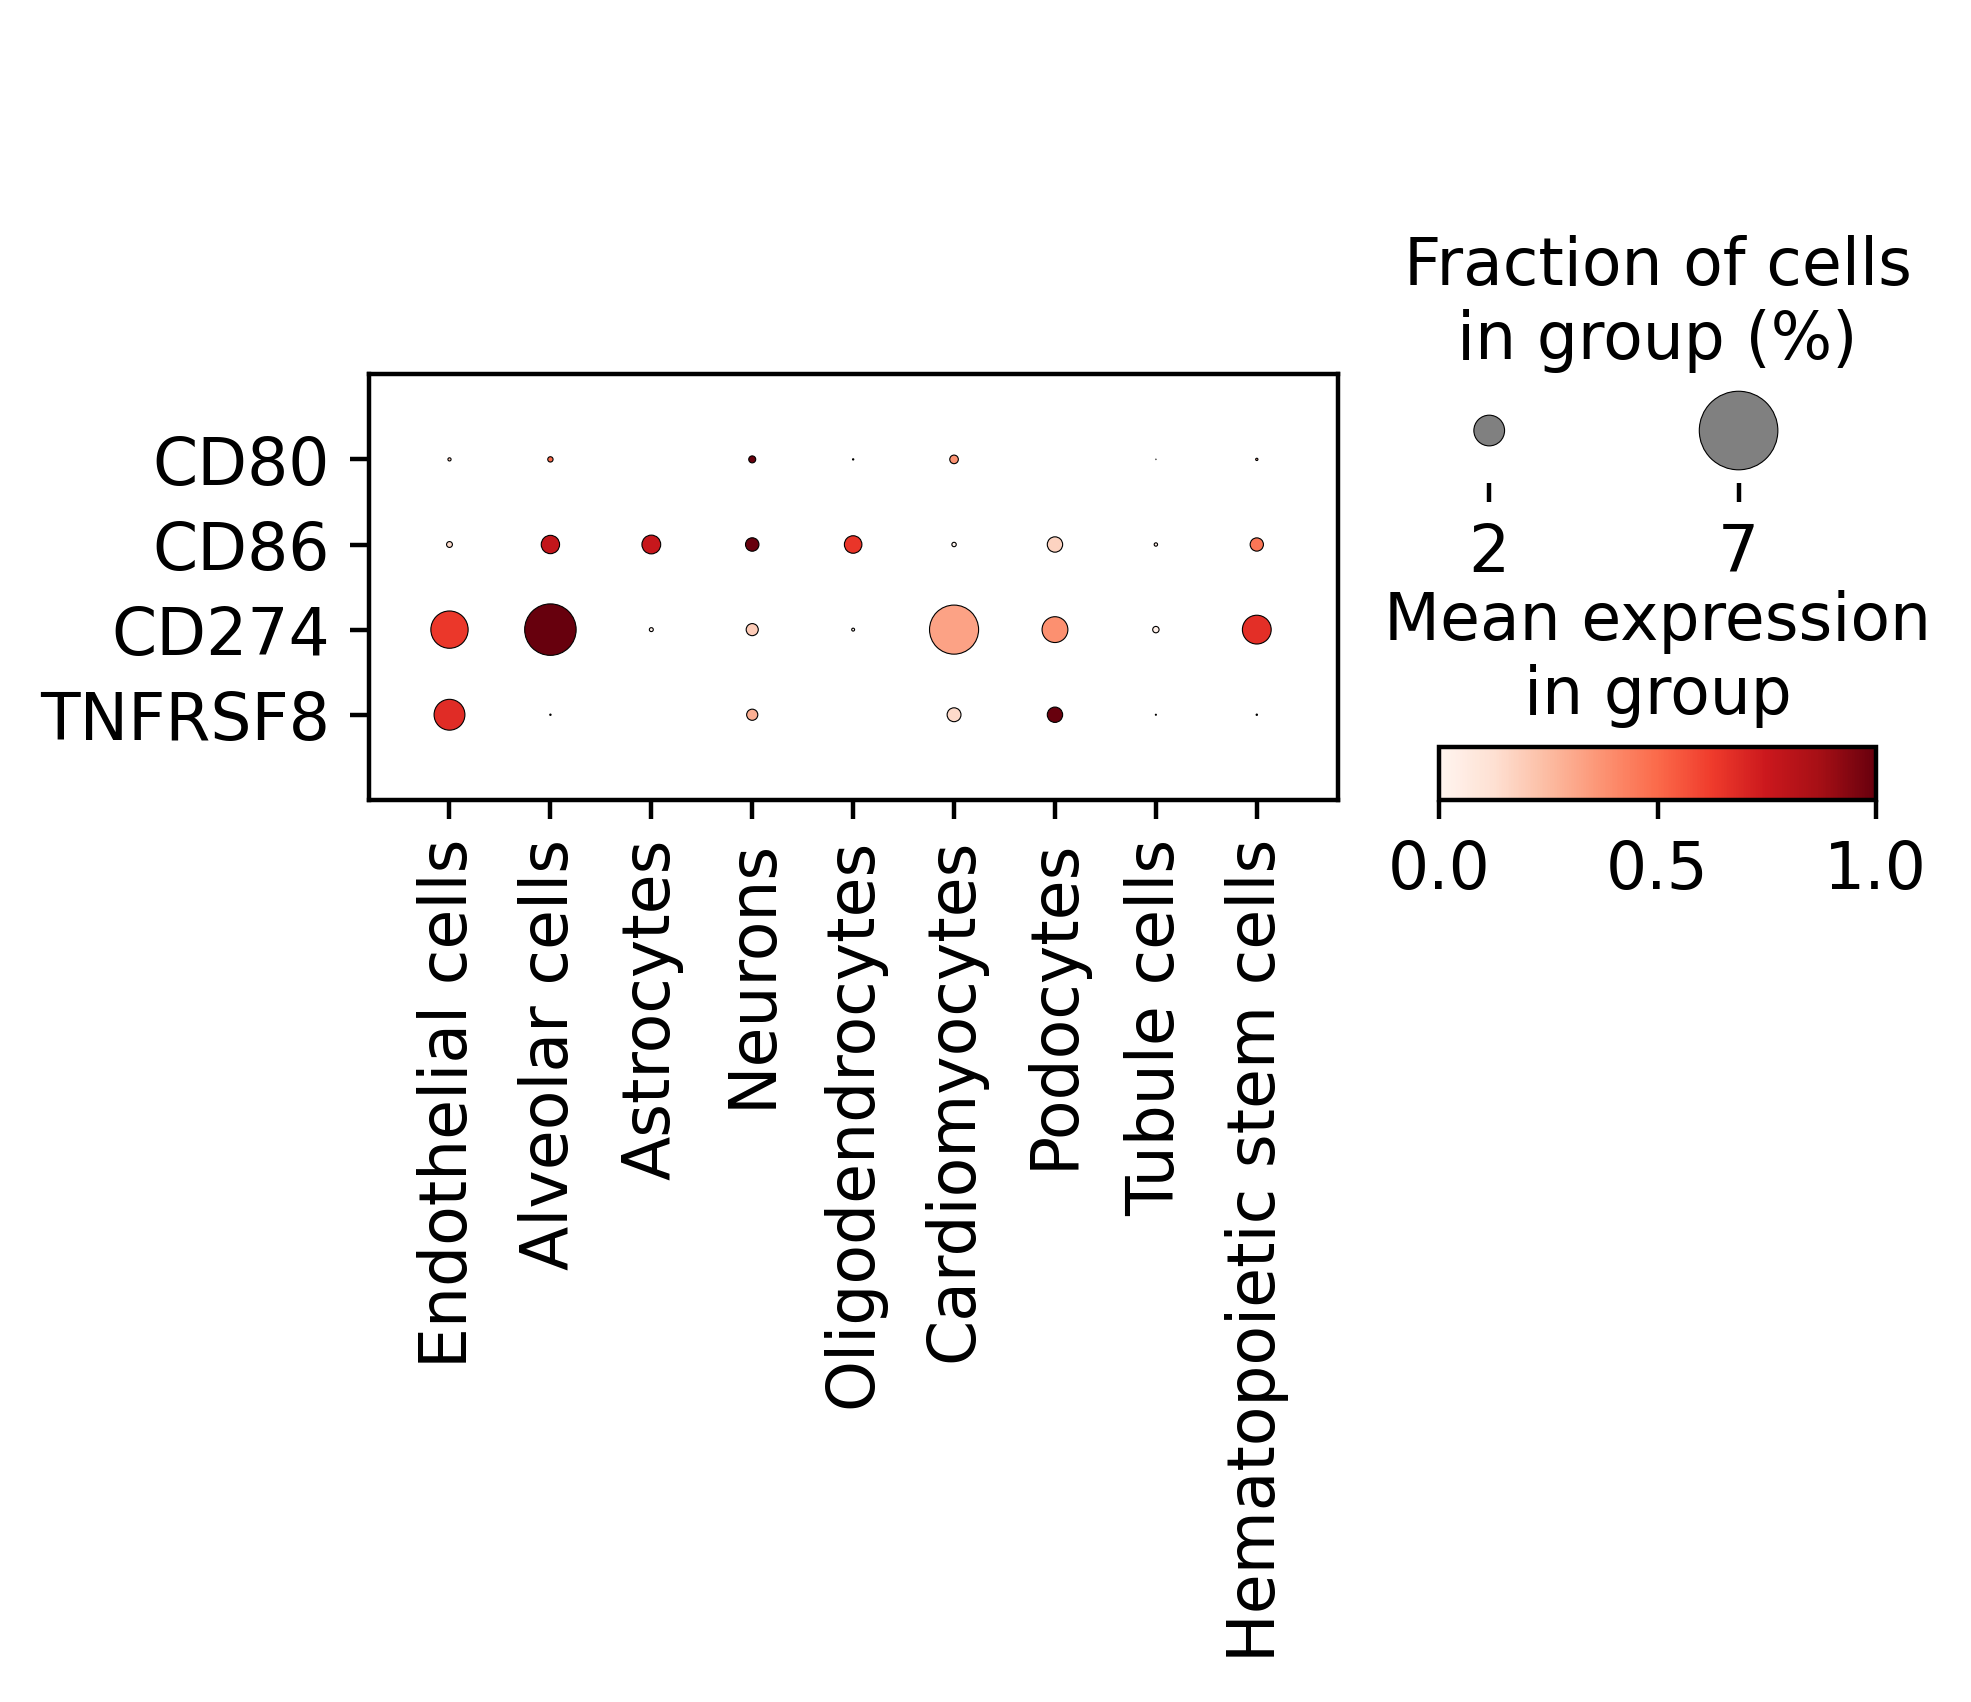

In [144]:
sc.pl.dotplot(adata_crit, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              var_group_rotation=90,
              dot_min=0,
              dot_max=0.07,
              #smallest_dot=0.01
             )

sc.pl.dotplot(adata_crit, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              swap_axes=True,
              var_group_rotation=90,
              dot_min=0,
              dot_max=0.07,
              #smallest_dot=0.01
             )

In [17]:
# immune cells
immune_cells=['Lymphatic endothelial cells','Common lymphoid progenitor cells','Innate lymphoid cells',
              'Lymphocytes', 'B cells','T cells', 'NK cells','Plasma cells','Leukocytes',
              'Common myeloid progenitor cells', 'Myeloid cells',
              'Granulocyte-monocyte progenitor cells',  'Granulocyte cells', 'Basophil cells','Eosinophils','Neutrophils',
              'Monocytes','Macrophages', 'Dendritic cells','Mast cells', 'Megakaryocytes','Thrombocytes',
              'Erythroid progenitor cells', 'Erythroid cells'
             ]

In [18]:
len(immune_cells)

24

In [19]:
ix=np.isin(adata_healthy.obs['celltype'],immune_cells) 
adata_immune=adata_healthy[ix].copy()

In [20]:
adata_immune.obs.celltype.cat.categories

Index(['B cells', 'Basophil cells', 'Common lymphoid progenitor cells',
       'Common myeloid progenitor cells', 'Dendritic cells', 'Eosinophils',
       'Erythroid cells', 'Erythroid progenitor cells', 'Granulocyte cells',
       'Granulocyte-monocyte progenitor cells', 'Innate lymphoid cells',
       'Leukocytes', 'Lymphatic endothelial cells', 'Lymphocytes',
       'Macrophages', 'Mast cells', 'Megakaryocytes', 'Monocytes',
       'Myeloid cells', 'NK cells', 'Neutrophils', 'Plasma cells', 'T cells',
       'Thrombocytes'],
      dtype='object')

In [21]:
len(adata_immune.obs.celltype.cat.categories)

24

In [22]:
immune_order=['Lymphatic endothelial cells','Common lymphoid progenitor cells','Innate lymphoid cells',
              'Lymphocytes', 'B cells','T cells', 'NK cells','Plasma cells','Leukocytes',
              'Common myeloid progenitor cells', 'Myeloid cells',
              'Granulocyte-monocyte progenitor cells',  'Granulocyte cells', 'Basophil cells','Eosinophils','Neutrophils',
              'Monocytes','Macrophages', 'Dendritic cells','Mast cells', 'Megakaryocytes','Thrombocytes',
              'Erythroid progenitor cells', 'Erythroid cells'
             ]

adata_immune.obs['celltype'].cat.reorder_categories(immune_order, inplace=True)

In [23]:
adata_immune

AnnData object with n_obs × n_vars = 863585 × 4
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3', 'batch'

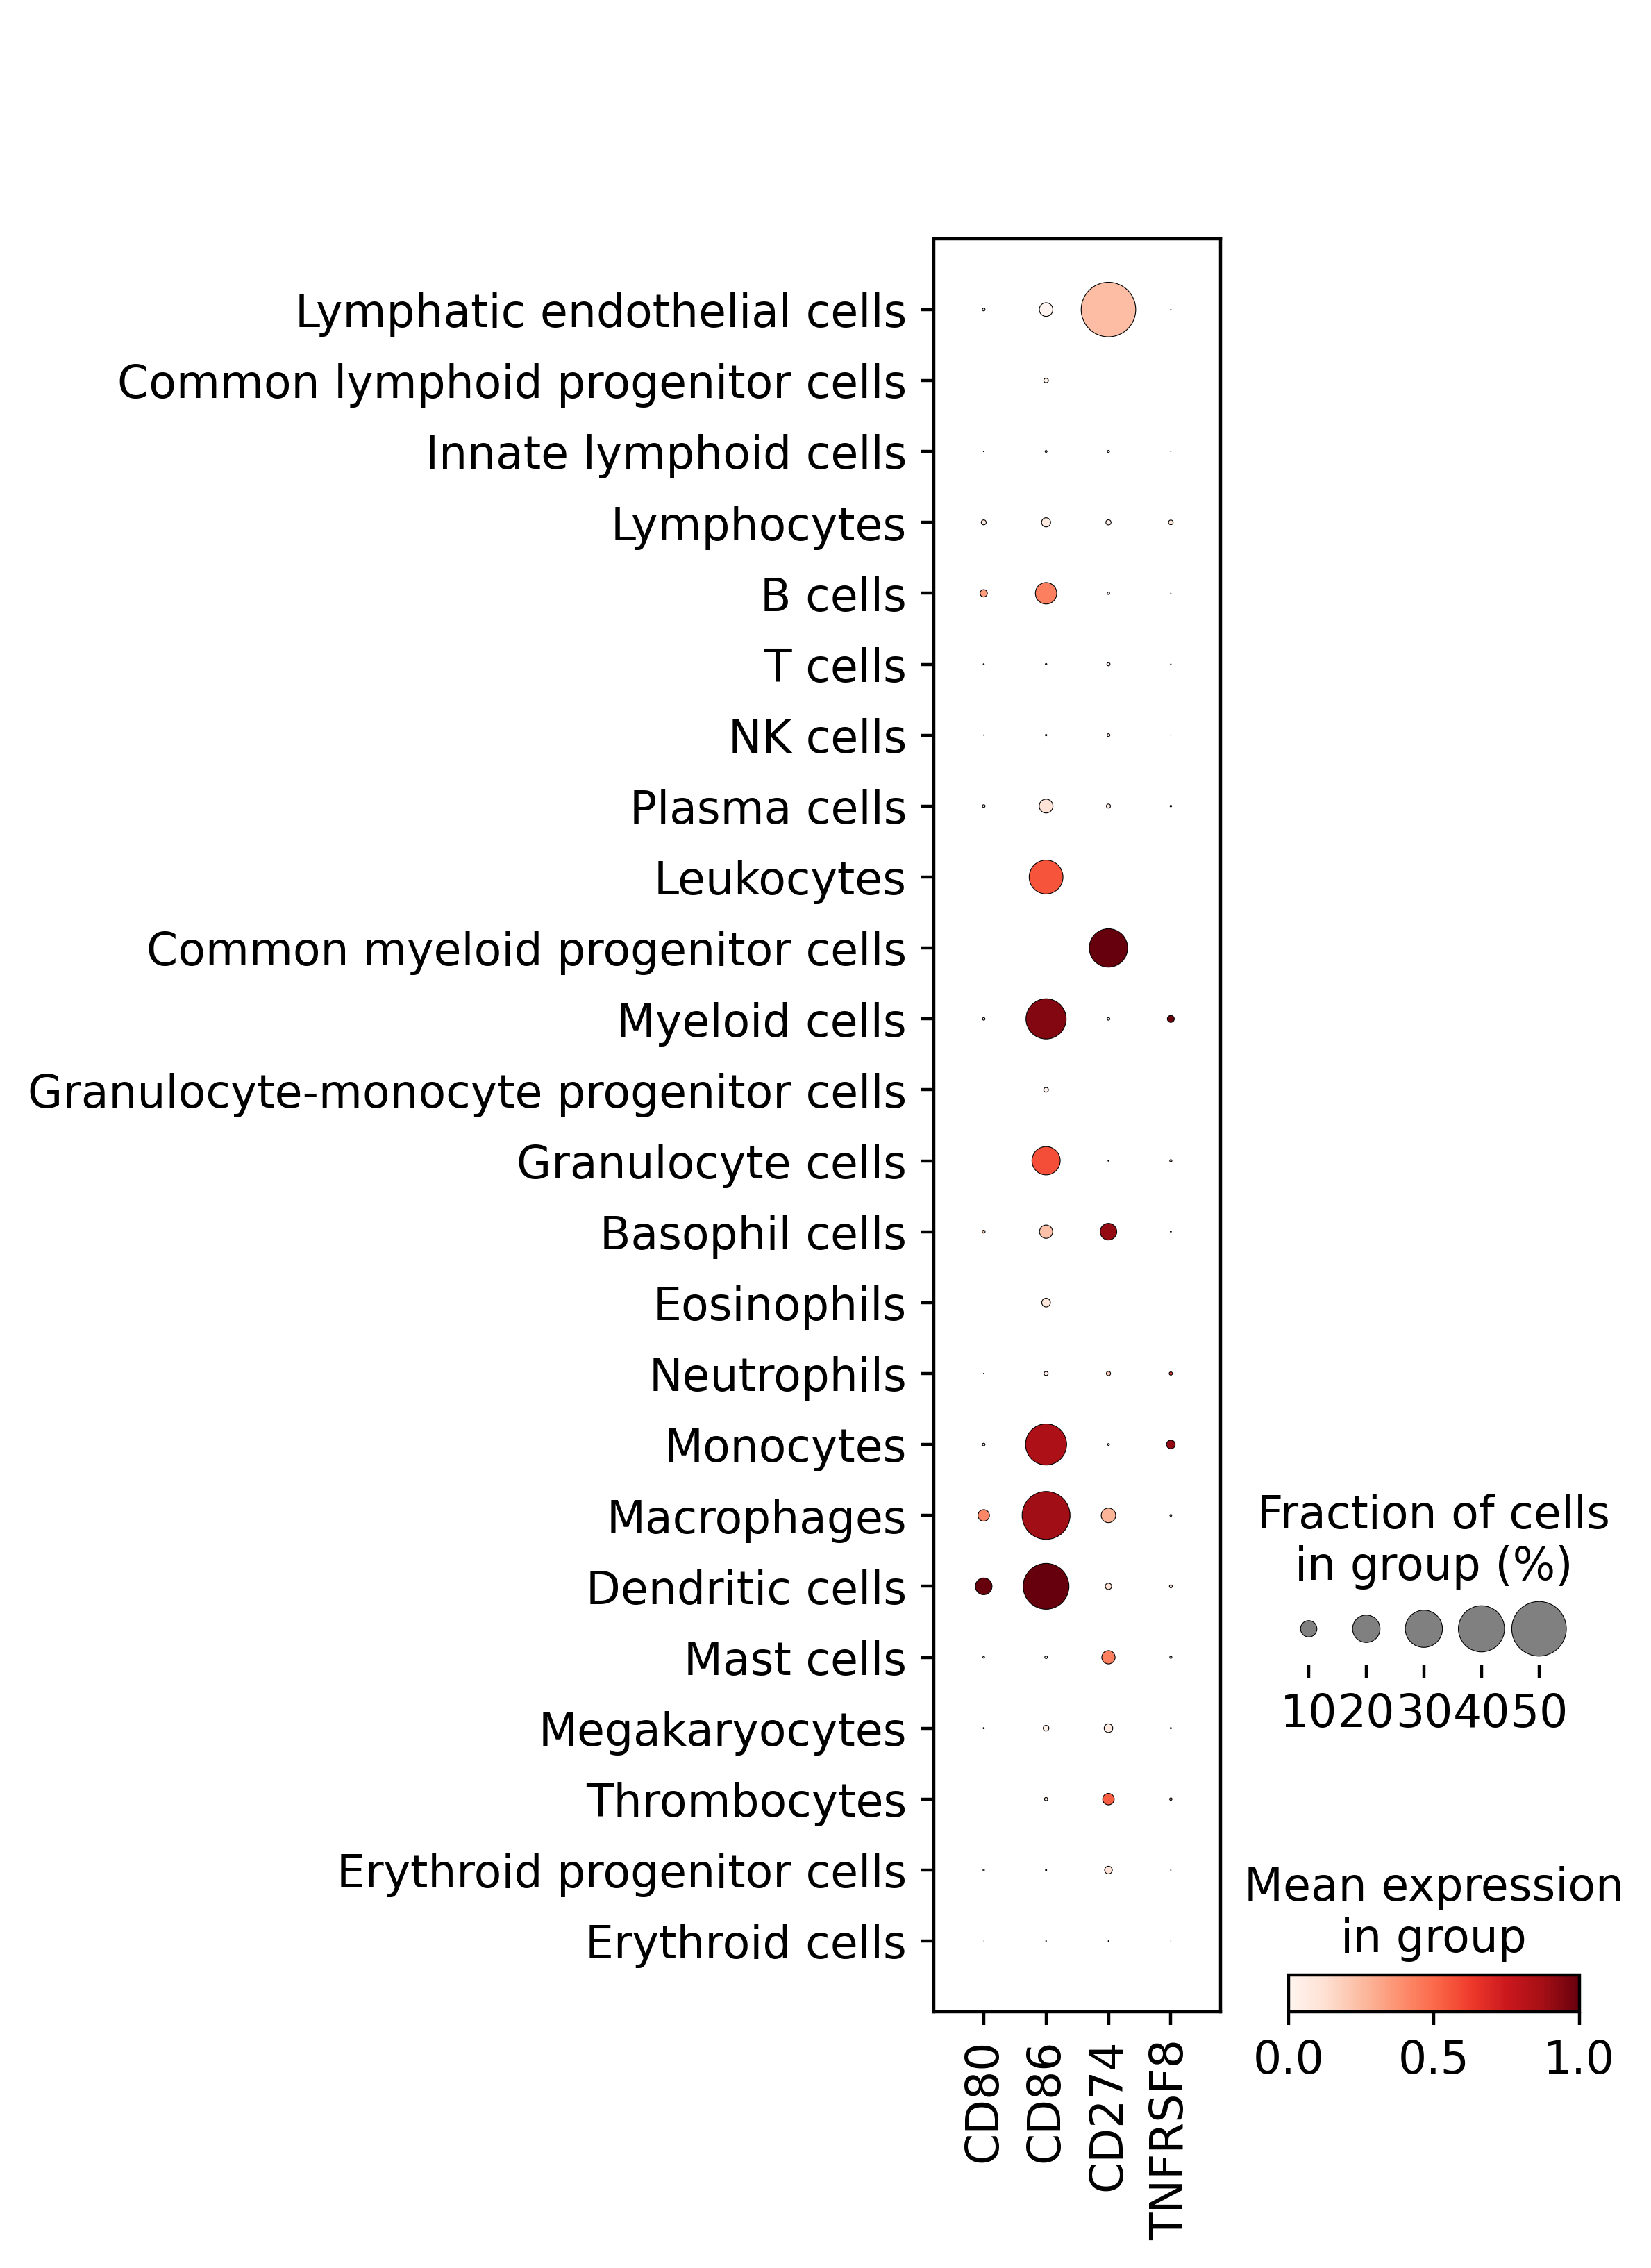

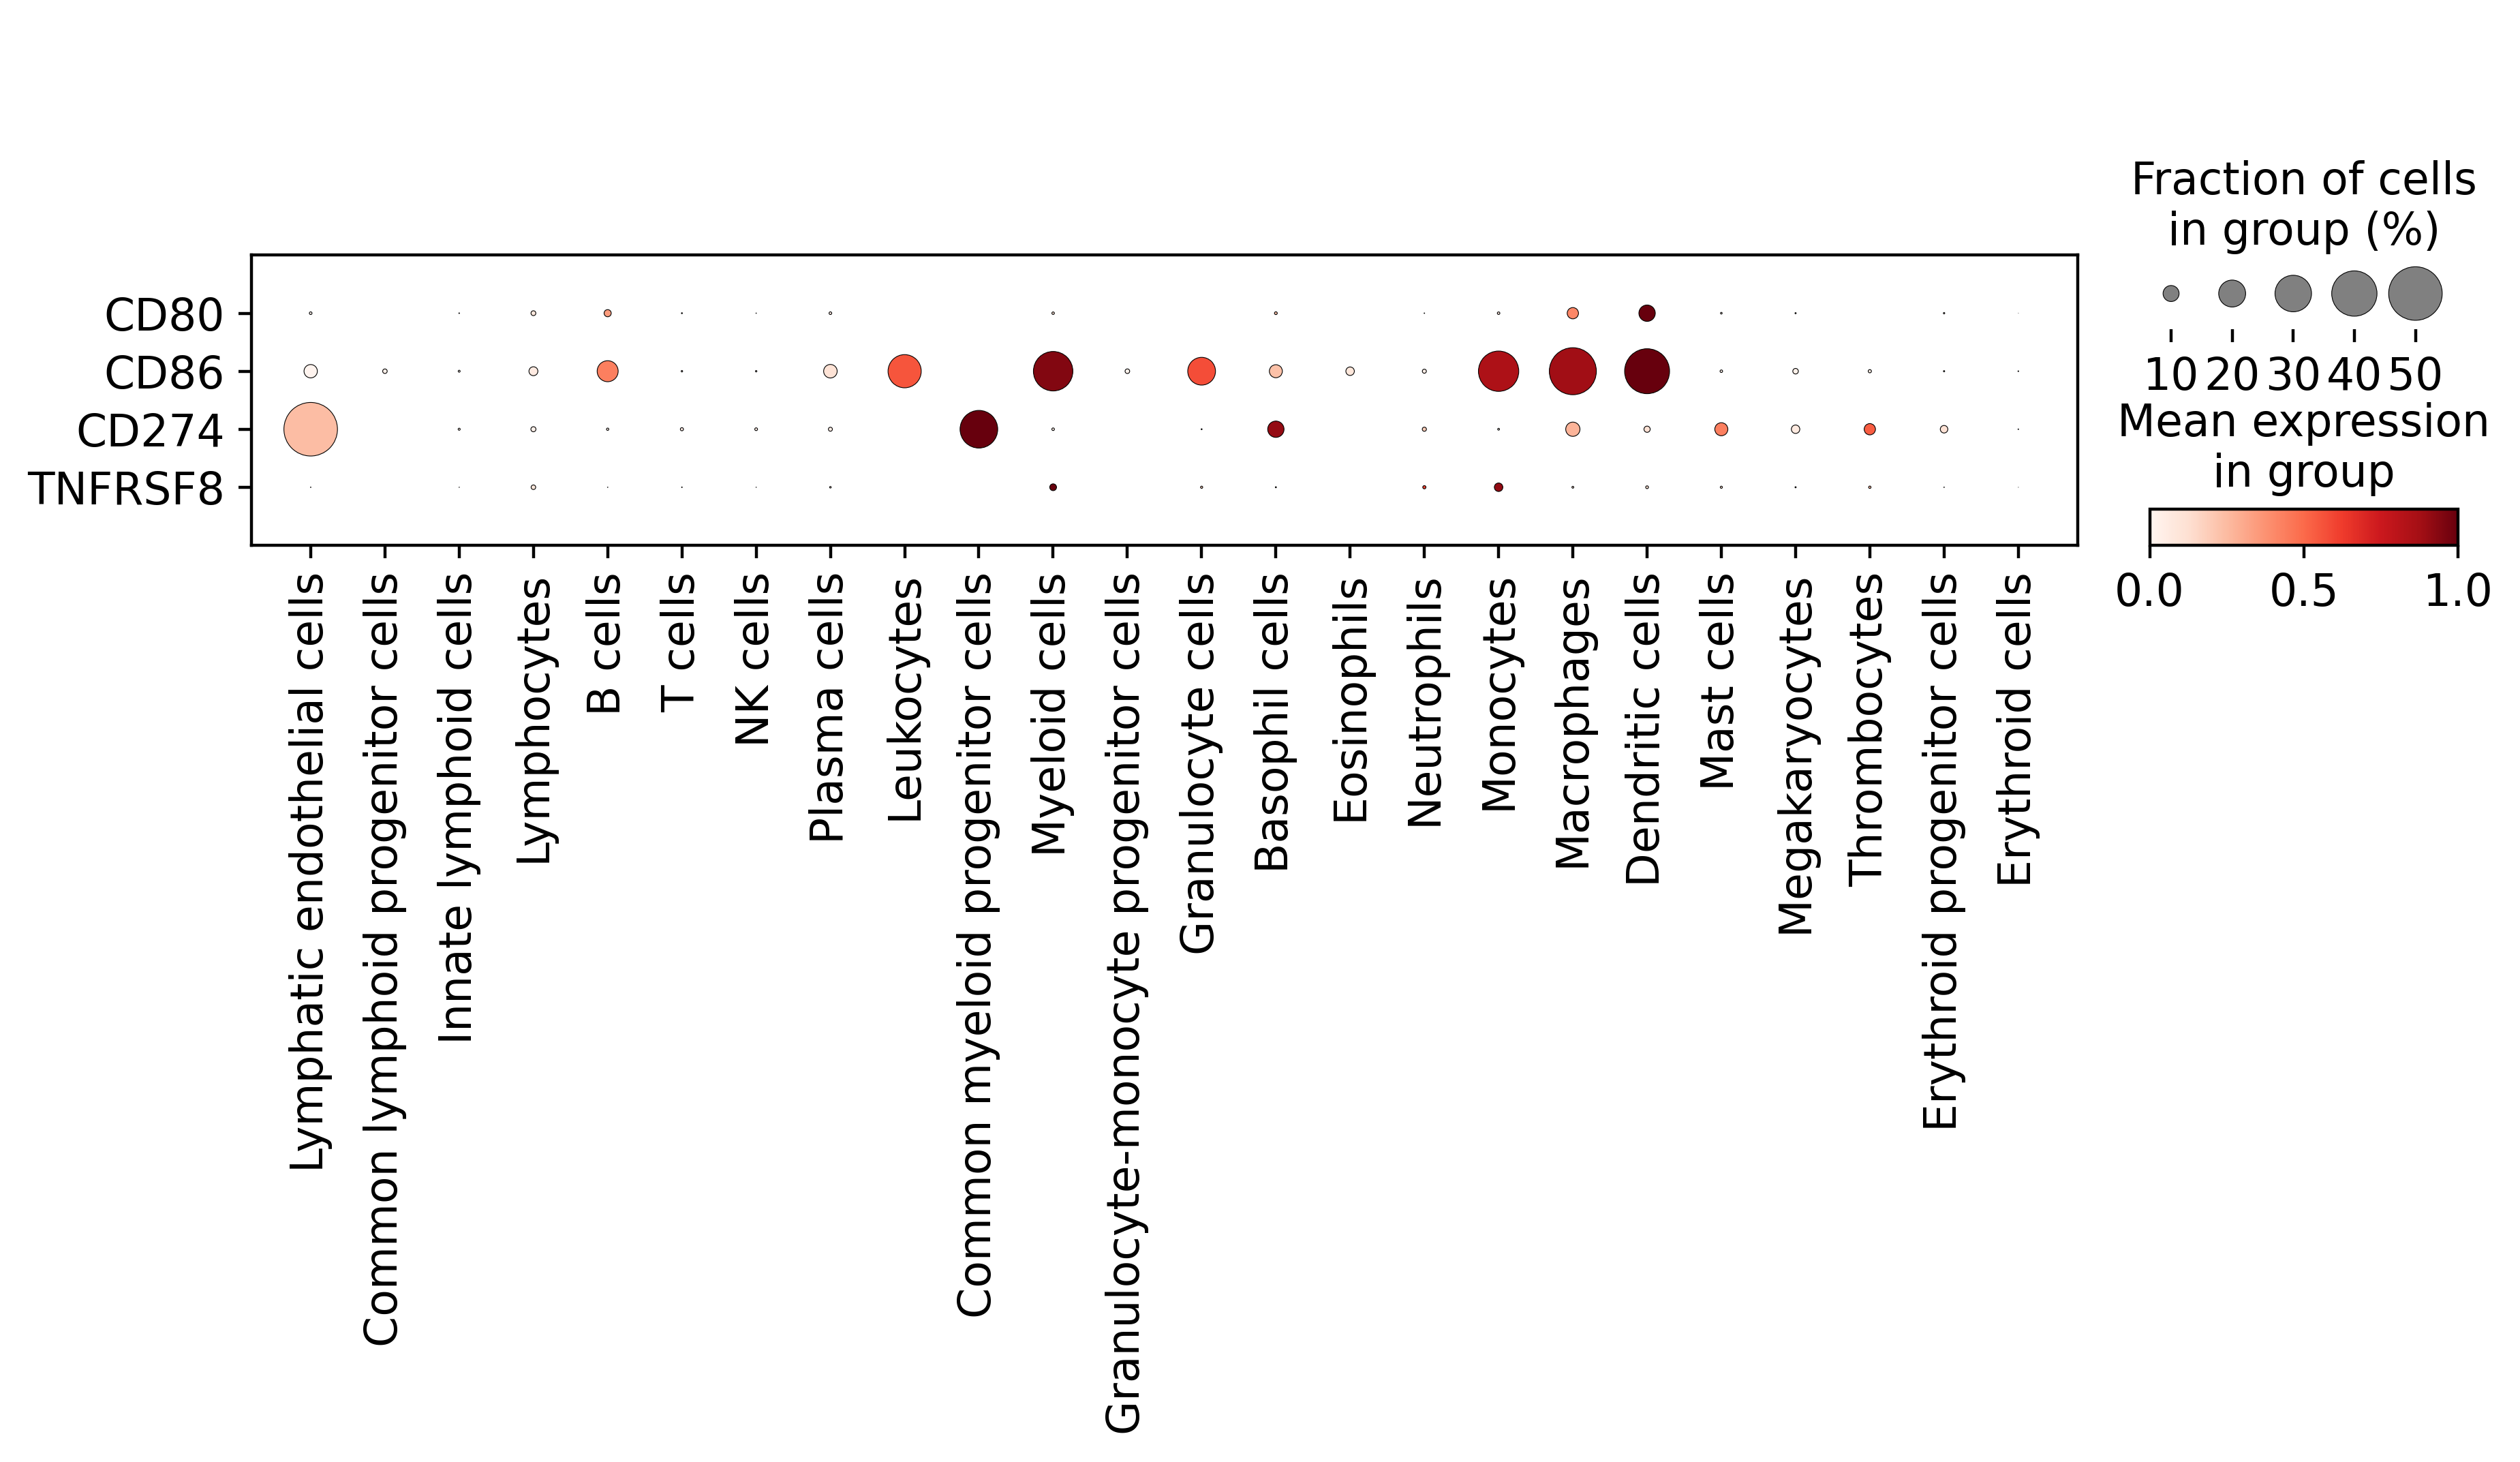

In [25]:
sc.pl.dotplot(adata_immune, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              var_group_rotation=90,
              #dot_min=0,
              dot_max=0.5,
              #smallest_dot=0.01
             )

sc.pl.dotplot(adata_immune, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              swap_axes=True,
              var_group_rotation=90,
              #dot_min=0,
              dot_max=0.5,
              #smallest_dot=0.01
             )

In [26]:
# rest
remove=critical_cells+immune_cells
all_cells=adata_healthy.obs.celltype.cat.categories
remaining_cells=all_cells[np.isin(all_cells, remove, invert=True)]

In [27]:
remaining_cells

Index(['Adipocytes', 'Airway epithelial cells', 'Basal cells',
       'Cerebellar epithelial cells', 'Cholangiocytes', 'Chondrocytes',
       'Collecting duct system cells', 'Fibroblast cells',
       'Fibromyocyte cells', 'Glial cells',
       'Glomerular visceral epithelial cells', 'Hepatic progenitor cells',
       'Hepatic stellate cells', 'Hepatocytes', 'Intestinal epithelial cells',
       'Intestinal progenitor cells', 'Intestinal secretory cells',
       'Intestinal stem cells', 'Keratinocytes', 'Kupffer cells',
       'Melanocytes', 'Mesangial cells', 'Mesenchymal stromal cells',
       'Mesothelial cells', 'Microglial cells', 'Mucosal squamous cells',
       'Multiciliated cells', 'Multipotent progenitor cells',
       'Myofibroblast cells', 'Neuroendocrine cells', 'Neuronal stem cells',
       'Oesophageal MT high cells', 'Oesophageal epithelial cells',
       'Pancreatic acinar cells', 'Pancreatic ductal cells',
       'Pancreatic endocrine cells', 'Pancreatic stellate cell

In [28]:
remaining_cells_order=[
    
    
    # general
    'Mesenchymal stromal cells', 'Mesothelial cells', 'Fibroblast cells', 'Fibromyocyte cells',
     'Multiciliated cells', 'Secretory cells', 'Adipocytes', 'Pericytes', 'Multipotent progenitor cells',
    'Skeletal muscle cells', 'Smooth muscle cells', 
   
    
    #lung
    'Airway epithelial cells',
    
    #brain
    'Cerebellar epithelial cells','Glial cells','Microglial cells', 'Neuronal stem cells',
    
    #liver
    'Hepatic progenitor cells','Hepatic stellate cells', 'Hepatocytes', 'Kupffer cells', 
    
    #skin
    'Basal cells','Chondrocytes','Keratinocytes','Melanocytes', 'Myofibroblast cells', 
    
    # gut
    'Intestinal epithelial cells',
       'Intestinal progenitor cells', 'Intestinal secretory cells',
       'Intestinal stem cells', 'Mucosal squamous cells', 'Neuroendocrine cells',
    'Oesophageal MT high cells','Oesophageal epithelial cells','Cholangiocytes', 
     'Ureteric epithelial cells', 'Urothelial cells',
    
    #pancreas
     'Pancreatic acinar cells', 'Pancreatic ductal cells',
       'Pancreatic endocrine cells', 'Pancreatic stellate cells',
    
    #kidney
    'Collecting duct system cells',  'Mesangial cells', 'Glomerular visceral epithelial cells', 
    'Parietal epithelial cells', 
    
    
 ]

In [33]:
ix=np.isin(adata_healthy.obs['celltype'],remaining_cells) 
adata_rest=adata_healthy[ix].copy()

In [34]:
adata_rest

AnnData object with n_obs × n_vars = 816667 × 4
    obs: 'InternDatasetNumber', 'celltype', 'Organ', 'Organ_Specific', 'Dataset', 'Dataset_status', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age', 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3', 'batch'

In [35]:
adata_rest.obs['celltype'].cat.reorder_categories(remaining_cells_order, inplace=True)

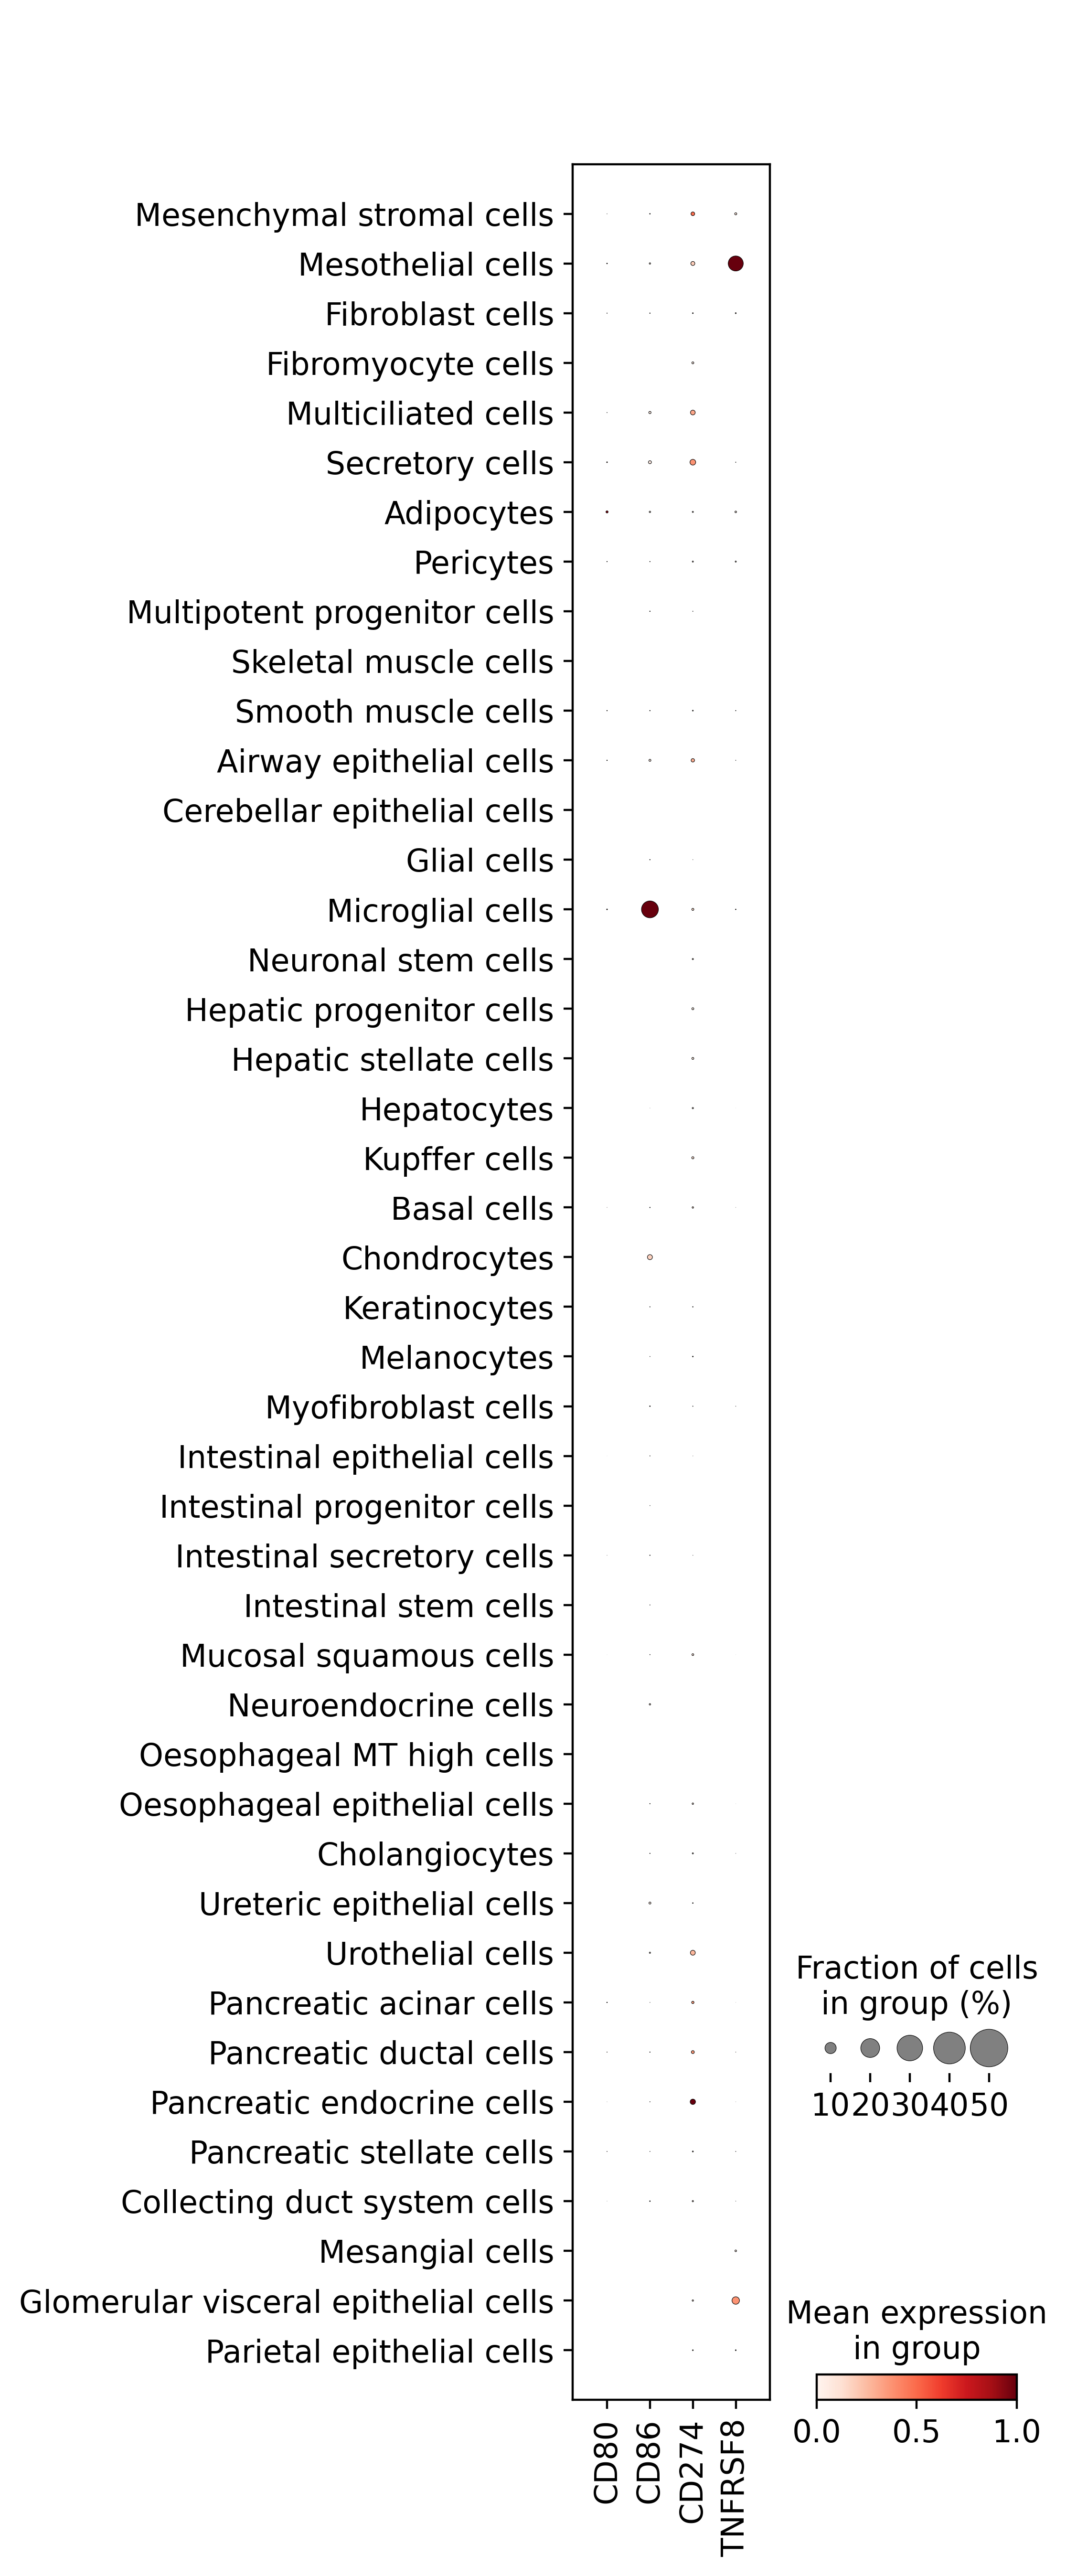

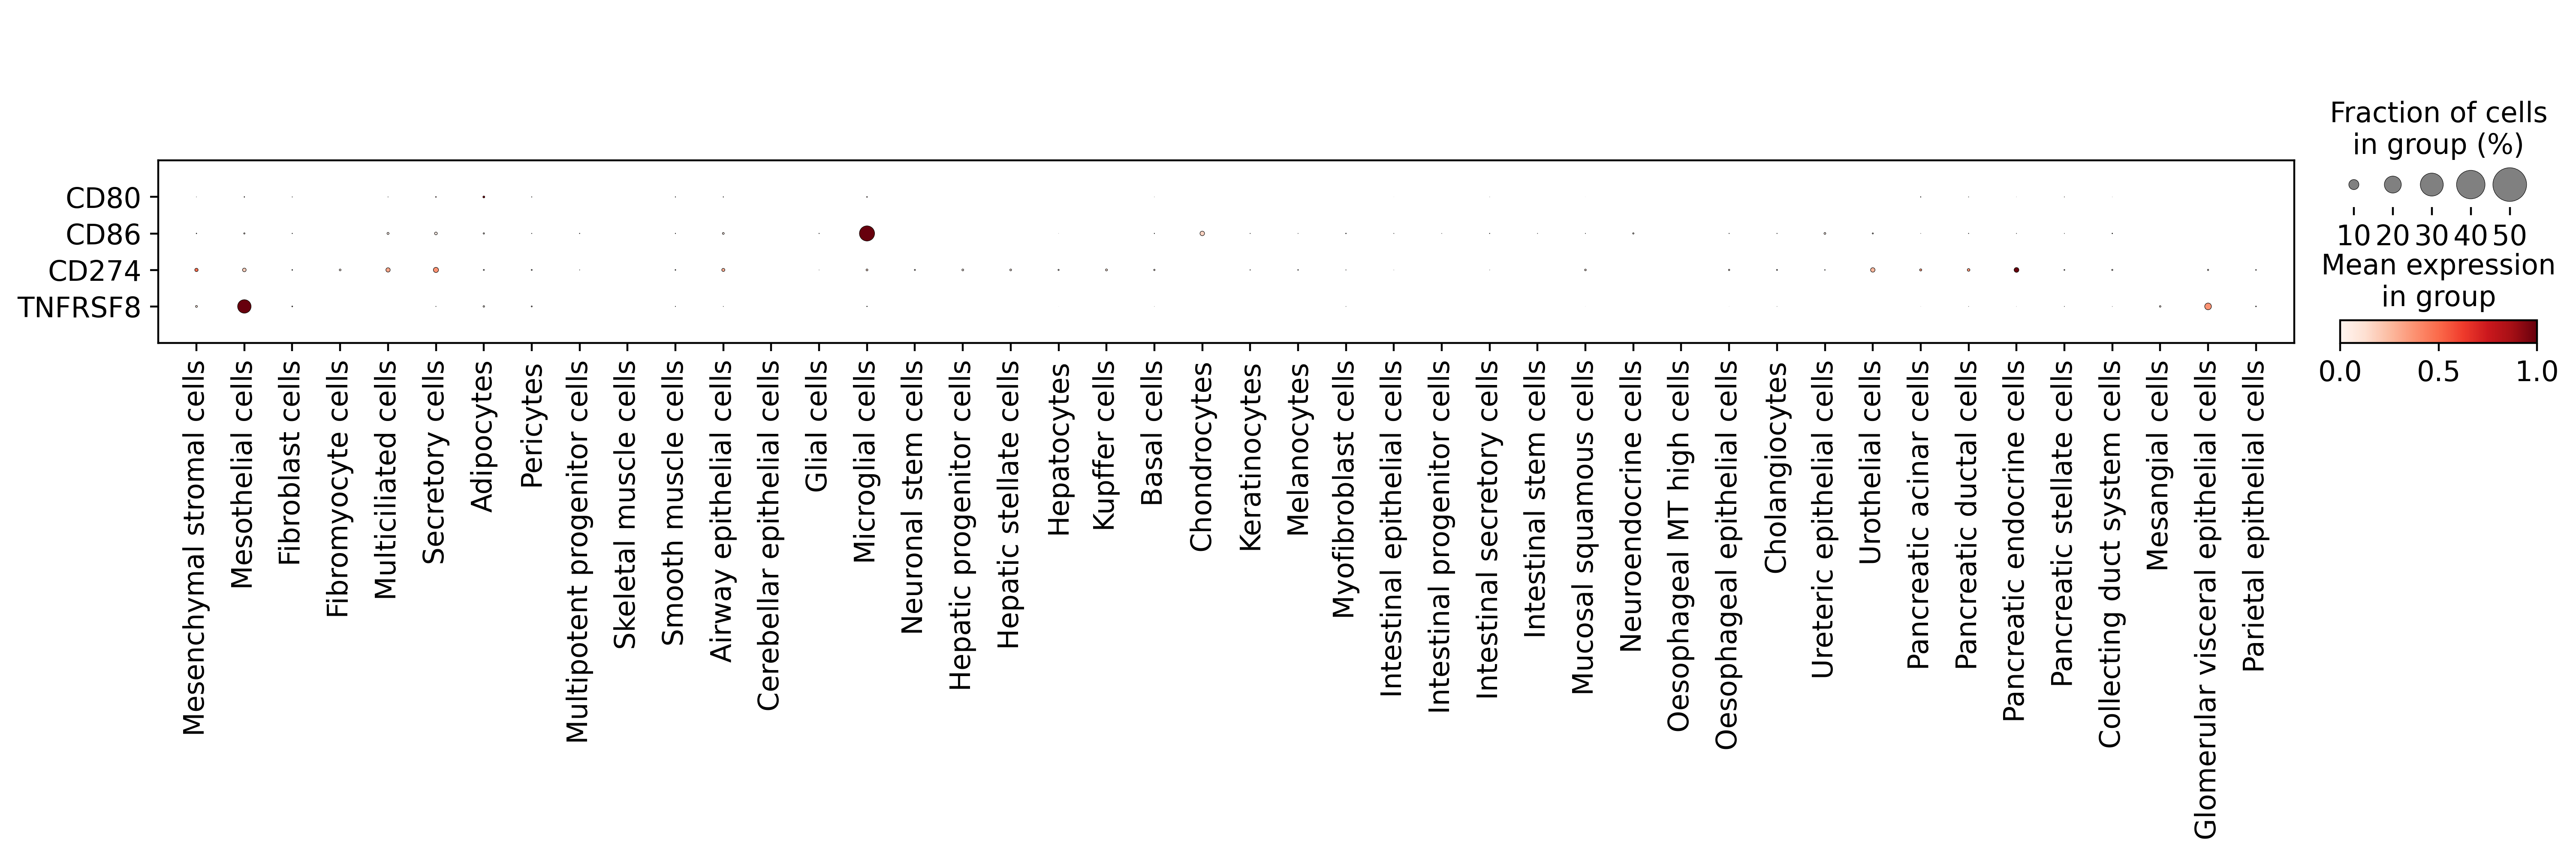

In [33]:
sc.pl.dotplot(adata_rest, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              var_group_rotation=90,
              #dot_min=0,
              dot_max=0.5,
              #smallest_dot=0.01
             )

sc.pl.dotplot(adata_rest, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              swap_axes=True,
              var_group_rotation=90,
              #dot_min=0,
              dot_max=0.5,
              #smallest_dot=0.01
             )

In [199]:
for dataset in range(len(list_of_healthy_datasets))[1:]:
    print(list_of_healthy_datasets[dataset])
    adata = sc.read(path +  list_of_healthy_datasets[dataset])
    adata.var['genes'] = adata.var.index
    ix=np.isin(adata.var['genes'], final_druggable)
    adata=adata[:,ix].copy()
    adata_obs_list = adata.obs.columns.tolist()
    
    #delete some unneccessary obs
    for obs_value in adata_obs_list:
        if obs_value in important_obs:
            u = 0
        else:
            del adata.obs[obs_value]
    #delete other useless stuff
    del adata.var
    del adata.obsm
    del adata.layers
    adata_healthy = adata_healthy.concatenate(adata,join='outer', index_unique="_")

01-2-Brain_Cerebellum-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad


/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


01-3-Brain_TemporalLobe-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad
01-4-Brain_SupragranularIntratelencephalicProjectingNeurons-Lein-2020-RubenBrabenec_IllProject-processed.h5ad


/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


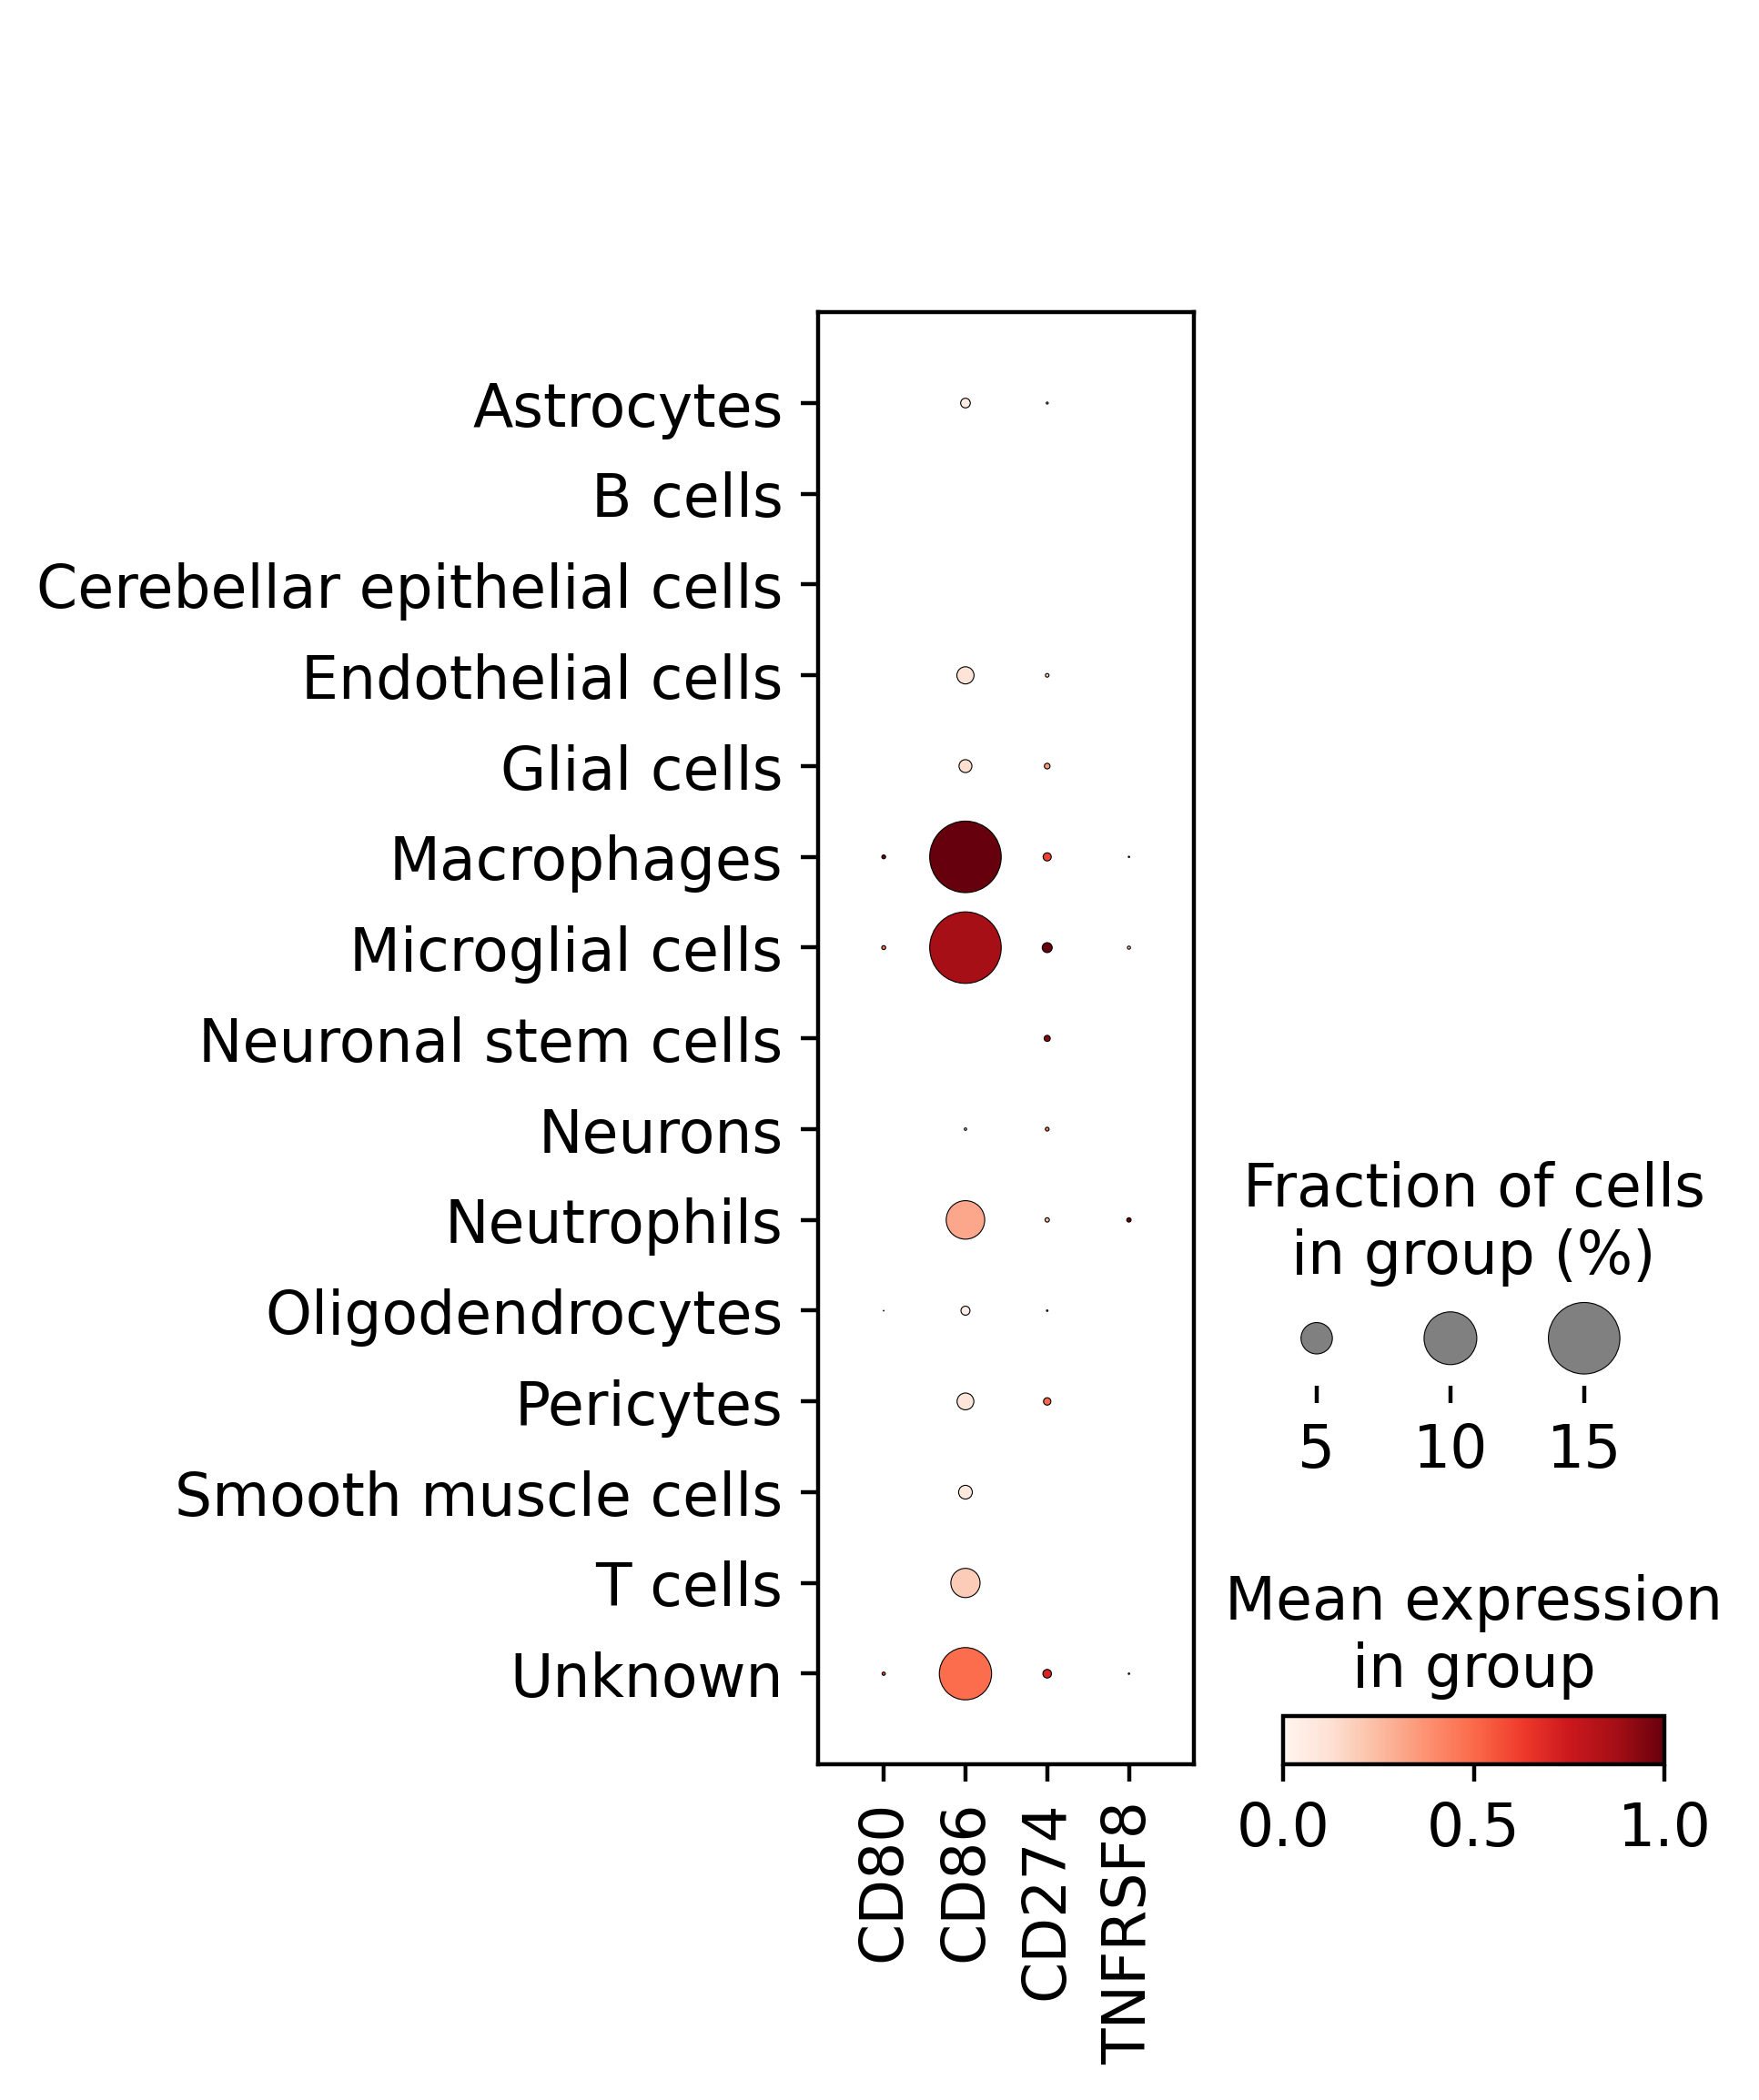

In [215]:
sc.pl.dotplot(adata_healthy, 
              var_names=final_druggable,
              groupby='celltype', 
              cmap='Reds',
              standard_scale='var',
              var_group_rotation=90,
              #dot_min=0,
              dot_max=0.15,
              #smallest_dot=0.01
             )

In [ ]:


important_obs = ['Organ','Organ_Specific', 'Dataset', 'InternDatasetNumber', 'Dataset_status', 
                 'celltype', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age',
                 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3']


for i in range(len(list_of_healthy_datasets)):
    print(list_of_healthy_datasets[i])
    
    if i == 0:
        adata = sc.read(path +  list_of_healthy_datasets[i])
        adata.var['genes'] = adata.var.index
        ix=np.isin(adata.var['genes'], final_druggable)
        adata=adata[:,ix].copy()
        adata.var_names_make_unique()
        adata.obs_names_make_unique()
        
        adata_obs_list = adata.obs.columns.tolist()
        for obs_value in adata_obs_list:
            if obs_value in important_obs:
                u = 0
            else:
                del adata.obs[obs_value]
        del adata.var
        del adata.obsm
        del adata.layers
        
        adata_healthy = adata.copy()
        
    else:
        adata = sc.read(path +  list_of_healthy_datasets[i])
        adata.var['genes'] = adata.var.index
        ix=np.isin(adata.var['genes'], final_druggable)
        adata=adata[:,ix].copy()
        
        adata_obs_list = adata.obs.columns.tolist()
        for obs_value in adata_obs_list:
            if obs_value in important_obs:
                u = 0
            else:
                del adata.obs[obs_value]
        del adata.var
        del adata.obsm
        del adata.layers
        
        adata_healthy = adata_healthy.concatenate(adata,
                                         join='outer', index_unique="_")
        
    %reset_selective -f "^adata$"
    
    print('Size File GB: ', sys.getsizeof(adata_healthy) / (1024*1024*1024.0))
    process = psutil.Process(os.getpid())
    print('RAM GB: ', process.memory_info().rss / (1024*1024*1024.0))
    print('Number of cells: ', len(adata_healthy.obs))
    print('__________________________________________________________________')
        
adata_healthy.strings_to_categoricals()